In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
repertoire_types = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']

# Experimental data

In [3]:
columns = ['th', 'observed_portion_frequency', 'class']
df_MIXCR = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_MIXCR_'+repertoire+'.csv')
    df_temp_aa['observed_portion_frequency'] = df_temp_aa['observed_portion_frequency'].fillna(1.0)
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa['th'] = df_temp_aa['th']*100
    
    df_temp_aa['class'] = repertoire

    df_MIXCR = pd.concat([df_MIXCR, df_temp_aa], ignore_index=True, sort=False)
    df_MIXCR['tool'] = 'MIXCR'

In [4]:
columns = ['th', 'observed_portion_frequency', 'class']
df_IMREP = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_IMREP_'+repertoire+'.csv')
    df_temp_aa['observed_portion_frequency'] = df_temp_aa['observed_portion_frequency'].fillna(1.0)
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa['th'] = df_temp_aa['th']*100

    df_temp_aa['class'] = repertoire

    df_IMREP = pd.concat([df_IMREP, df_temp_aa], ignore_index=True, sort=False)
    df_IMREP['tool'] = 'IMREP'

In [5]:
columns = ['th', 'observed_portion_frequency', 'class']
df_TRUST4 = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_TRUST4_'+repertoire+'.csv')
    df_temp_aa['observed_portion_frequency'] = df_temp_aa['observed_portion_frequency'].fillna(1.0)
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa['th'] = df_temp_aa['th']*100

    df_temp_aa['class'] = repertoire

    df_TRUST4 = pd.concat([df_TRUST4, df_temp_aa], ignore_index=True, sort=False)
    df_TRUST4['tool'] = 'TRUST4'

# In silicon data

In [6]:
df_in_silicon_MIXCR = pd.read_csv('../summary_data/subsample/capturing_per_reads/capturing_MIXCR_260.csv')
df_in_silicon_MIXCR['observed_portion_frequency'] = df_in_silicon_MIXCR['observed_portion_frequency'].fillna(1.0)
df_in_silicon_MIXCR = df_in_silicon_MIXCR[df_in_silicon_MIXCR.observed_portion_frequency != 0]
df_in_silicon_MIXCR['th'] = df_in_silicon_MIXCR['th']*100
df_in_silicon_MIXCR['tool'] = 'MIXCR'
df_in_silicon_MIXCR['class'] = 'T_cell_poor_monoclonal'

df_in_silicon_IMREP = pd.read_csv('../summary_data/subsample/capturing_per_reads/capturing_IMREP_260.csv')
df_in_silicon_IMREP['observed_portion_frequency'] = df_in_silicon_IMREP['observed_portion_frequency'].fillna(1.0)
df_in_silicon_IMREP = df_in_silicon_IMREP[df_in_silicon_IMREP.observed_portion_frequency != 0]
df_in_silicon_IMREP['th'] = df_in_silicon_IMREP['th']*100
df_in_silicon_IMREP['tool'] = 'IMREP'
df_in_silicon_IMREP['class'] = 'T_cell_poor_monoclonal'

df_in_silicon_TRUST4 = pd.read_csv('../summary_data/subsample/capturing_per_reads/capturing_TRUST4_260.csv')
df_in_silicon_TRUST4['observed_portion_frequency'] = df_in_silicon_TRUST4['observed_portion_frequency'].fillna(1.0)
df_in_silicon_TRUST4 = df_in_silicon_TRUST4[df_in_silicon_TRUST4.observed_portion_frequency != 0]
df_in_silicon_TRUST4['th'] = df_in_silicon_TRUST4['th']*100
df_in_silicon_TRUST4['tool'] = 'TRUST4'
df_in_silicon_TRUST4['class'] = 'T_cell_poor_monoclonal'

In [7]:
df_combined = pd.concat([df_MIXCR,df_IMREP,df_TRUST4,df_in_silicon_MIXCR,df_in_silicon_IMREP,df_in_silicon_TRUST4], ignore_index=True, sort=False)
df_combined

,th,observed_portion_frequency,class,tool
0,0.000,0.928713,T_cell_rich_monoclonal,MIXCR
1,0.001,0.943874,T_cell_rich_monoclonal,MIXCR
2,0.002,0.946668,T_cell_rich_monoclonal,MIXCR
3,0.003,0.979478,T_cell_rich_monoclonal,MIXCR
4,0.004,0.989179,T_cell_rich_monoclonal,MIXCR
...,...,...,...,...
1199995,99.996,1.000000,T_cell_poor_monoclonal,TRUST4
1199996,99.997,1.000000,T_cell_poor_monoclonal,TRUST4
1199997,99.998,1.000000,T_cell_poor_monoclonal,TRUST4
1199998,99.999,1.000000,T_cell_poor_monoclonal,TRUST4


# MIXCR

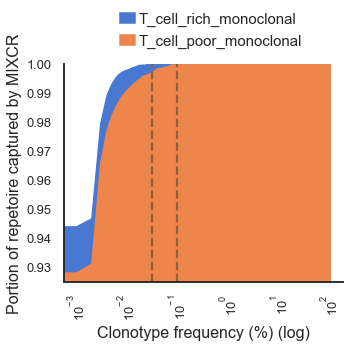

In [8]:
T_cell_rich_monoclonal_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_monoclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_monoclonal_MIXCR['th'], T_cell_rich_monoclonal_MIXCR['observed_portion_frequency'], labels=["T_cell_rich_monoclonal"],color=['#4878d0'])
ax.stackplot(df_in_silicon_MIXCR['th'], df_in_silicon_MIXCR['observed_portion_frequency'], labels=["T_cell_poor_monoclonal"],color=['#ee854a'])
value1 = T_cell_rich_monoclonal_MIXCR.loc[T_cell_rich_monoclonal_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = df_in_silicon_MIXCR.loc[df_in_silicon_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
#plt.text(value1,0.9083,value1.round(4),fontsize=13,rotation=90)
#plt.text(value2,0.9083,value2.round(4),fontsize=13,rotation=90)

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.925,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
sns.despine()
plt.subplots_adjust(wspace=0.5)
plt.show(block=False)

fig = ax.get_figure()

fig.savefig("../figures/main/figure1_a1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_a1.png",bbox_inches="tight")

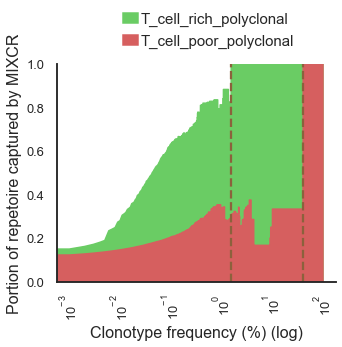

In [9]:
T_cell_rich_polyclonal_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_polyclonal']
T_cell_poor_polyclonal_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_polyclonal_MIXCR['th'], T_cell_rich_polyclonal_MIXCR['observed_portion_frequency'], labels=["T_cell_rich_polyclonal"],color=['#6acc64'])
ax.stackplot(T_cell_poor_polyclonal_MIXCR['th'], T_cell_poor_polyclonal_MIXCR['observed_portion_frequency'], labels=["T_cell_poor_polyclonal"],color=['#d65f5f'])

value1 = T_cell_rich_polyclonal_MIXCR.loc[T_cell_rich_polyclonal_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_polyclonal_MIXCR.loc[T_cell_poor_polyclonal_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
#plt.text(value1,-0.19,value1.round(4),fontsize=13,rotation=90)
#plt.text(value2,-0.19,value2.round(4),fontsize=13,rotation=90)

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
sns.despine()
plt.subplots_adjust(wspace=0.5)
plt.show(block=False)

fig = ax.get_figure()

fig.savefig("../figures/main/figure1_b1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_b1.png",bbox_inches="tight")

# IMREP

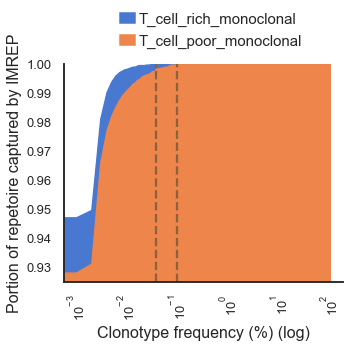

In [10]:
T_cell_rich_monoclonal_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_monoclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_monoclonal_IMREP['th'], T_cell_rich_monoclonal_IMREP['observed_portion_frequency'], labels=["T_cell_rich_monoclonal"],color=['#4878d0'])
ax.stackplot(df_in_silicon_IMREP['th'], df_in_silicon_IMREP['observed_portion_frequency'], labels=["T_cell_poor_monoclonal"],color=['#ee854a'])

value1 = T_cell_rich_monoclonal_IMREP.loc[T_cell_rich_monoclonal_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = df_in_silicon_IMREP.loc[df_in_silicon_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
#plt.text(value2,0.9083,value2.round(4),fontsize=13,rotation=90)

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.925,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
sns.despine()
plt.subplots_adjust(wspace=0.5)
plt.show(block=False)

fig = ax.get_figure()

fig.savefig("../figures/main/figure1_a2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_a2.png",bbox_inches="tight")

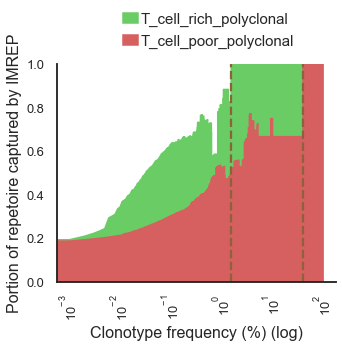

In [11]:
T_cell_rich_polyclonal_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_polyclonal']
T_cell_poor_polyclonal_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_polyclonal_IMREP['th'], T_cell_rich_polyclonal_IMREP['observed_portion_frequency'], labels=["T_cell_rich_polyclonal"],color=['#6acc64'])
ax.stackplot(T_cell_poor_polyclonal_IMREP['th'], T_cell_poor_polyclonal_IMREP['observed_portion_frequency'], labels=["T_cell_poor_polyclonal"],color=['#d65f5f'])

value1 = T_cell_rich_polyclonal_IMREP.loc[T_cell_rich_polyclonal_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_polyclonal_IMREP.loc[T_cell_poor_polyclonal_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
#plt.text(value1,-0.19,value1.round(4),fontsize=13,rotation=90)
#plt.text(value2,-0.19,value2.round(4),fontsize=13,rotation=90)

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
sns.despine()
plt.subplots_adjust(wspace=0.5)
plt.show(block=False)

fig = ax.get_figure()

fig.savefig("../figures/main/figure1_b2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_b2.png",bbox_inches="tight")

# TRUST4

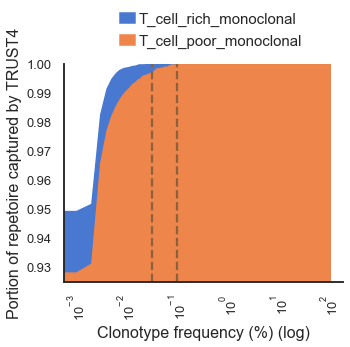

In [12]:
T_cell_rich_monoclonal_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_monoclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_monoclonal_TRUST4['th'], T_cell_rich_monoclonal_TRUST4['observed_portion_frequency'], labels=["T_cell_rich_monoclonal"],color=['#4878d0'])
ax.stackplot(df_in_silicon_TRUST4['th'], df_in_silicon_TRUST4['observed_portion_frequency'], labels=["T_cell_poor_monoclonal"],color=['#ee854a'])

value1 = T_cell_rich_monoclonal_TRUST4.loc[T_cell_rich_monoclonal_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = df_in_silicon_TRUST4.loc[df_in_silicon_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
#plt.text(value1,0.9083,value1.round(4),fontsize=13,rotation=90)
#plt.text(value2,0.9083,value2.round(4),fontsize=13,rotation=90)

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.925,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
sns.despine()
plt.subplots_adjust(wspace=0.5)
plt.show(block=False)

fig = ax.get_figure()

fig.savefig("../figures/main/figure1_a3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_a3.png",bbox_inches="tight")

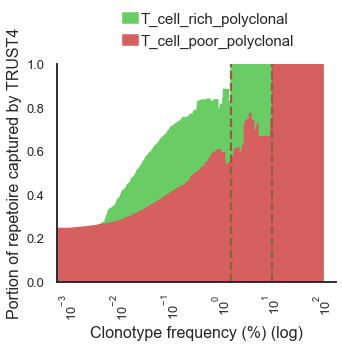

In [13]:
T_cell_rich_polyclonal_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_polyclonal']
T_cell_poor_polyclonal_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_polyclonal_TRUST4['th'], T_cell_rich_polyclonal_TRUST4['observed_portion_frequency'], labels=["T_cell_rich_polyclonal"],color=['#6acc64'])
ax.stackplot(T_cell_poor_polyclonal_TRUST4['th'], T_cell_poor_polyclonal_TRUST4['observed_portion_frequency'], labels=["T_cell_poor_polyclonal"],color=['#d65f5f'])

value1 = T_cell_rich_polyclonal_TRUST4.loc[T_cell_rich_polyclonal_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_polyclonal_TRUST4.loc[T_cell_poor_polyclonal_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
#plt.text(value1,-0.19,value1.round(4),fontsize=13,rotation=90)
#plt.text(value2,-0.19,value2.round(4),fontsize=13,rotation=90)

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
sns.despine()
plt.subplots_adjust(wspace=0.5)
plt.show(block=False)

fig = ax.get_figure()

fig.savefig("../figures/main/figure1_b3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_b3.png",bbox_inches="tight")

In [14]:
portion = df_combined.loc[df_combined['th'] == 0]
mean_portion = portion.groupby(["class"])["observed_portion_frequency"].agg(["mean", "std"]) 
display(mean_portion)

,mean,std
class,,
T_cell_poor_monoclonal,0.912754,0.000000
T_cell_poor_polyclonal,0.181272,0.060523
T_cell_rich_monoclonal,0.931769,0.002864
T_cell_rich_polyclonal,0.160147,0.027298


In [15]:
df = pd.read_csv("../summary_data/original/all_tools_TRB.csv")
T_cell_poor_monoclonal = pd.read_csv("../summary_data/subsample/T_cell_poor_monoclonal.csv")
df = pd.concat([df,T_cell_poor_monoclonal],ignore_index=True,sort=False)
df = df.loc[~(df['frequency_TCR'] == 0)]
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,repertoire_type,class
0,SRR5233637,CASSLPKETQYF,11.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000004,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
1,SRR5233637,CASLGRHYNEQFF,1097.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000360,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
2,SRR5233637,CASTQAAGTEKLFF,42.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000014,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
3,SRR5233637,CASSVPRGDYEQYF,61.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000020,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
4,SRR5233637,CASTPLGAEGSPLHF,2994.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000982,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413359,insilco_sample3,CSAKEAGAFQAYNEQFF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000007,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal
413360,insilco_sample3,CASSLELAGGFYEQYF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000007,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal
413361,insilco_sample3,CANRGGDNYGYTF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000007,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal
413362,insilco_sample3,CASRETGVQPQHF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000007,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal


In [16]:
# Select 5 clonotypes with the highest frequency for each sample 
df_top5 = pd.DataFrame()

samples = ['sample01','sample02','sample03','sample04','sample05','sample06','sample07',
           'sample08', 'sample09','sample10','sample11','sample12','sample13','sample14','sample15','TCGA-CZ-4862',
           'TCGA-CZ-5463','TCGA-CZ-5985','SRR5233637','SRR5233639','insilco_sample1','insilco_sample2','insilco_sample3']

for sample in samples: 
    df_sample = df.loc[df['Sample'] == sample]
    df_temp_top = df_sample.nlargest(5,'frequency_TCR')
    
    df_top5 = pd.concat([df_top5, df_temp_top], ignore_index=True, sort=False)

In [17]:
## Calculate the coverage of the top 5 clonotypes by each tool 
# TCR 
TCR_top5 = df_top5.groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TCR'].count().reset_index().rename(columns={'frequency_TCR':'count_TCR_top5'})

# MIXCR
MIXCR_top5 = df_top5[df_top5['frequency_MIXCR'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_MIXCR'].count().reset_index().rename(columns={'frequency_MIXCR':'count_tool_top5'})
MIXCR_top5 = pd.merge(TCR_top5, MIXCR_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
MIXCR_top5['tool'] = 'MIXCR'

# IMREP
IMREP_top5 = df_top5[df_top5['frequency_IMREP'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_IMREP'].count().reset_index().rename(columns={'frequency_IMREP':'count_tool_top5'})
IMREP_top5 = pd.merge(TCR_top5, IMREP_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
IMREP_top5['tool'] = 'IMREP'

# TRUST4
TRUST4_top5 = df_top5[df_top5['frequency_TRUST4'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TRUST4'].count().reset_index().rename(columns={'frequency_TRUST4':'count_tool_top5'})
TRUST4_top5 = pd.merge(TCR_top5, TRUST4_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
TRUST4_top5['tool'] = 'TRUST4'

overlap_count_top5 = pd.concat([MIXCR_top5,IMREP_top5,TRUST4_top5],ignore_index=True)
overlap_count_top5['overlap_percentage'] = overlap_count_top5['count_tool_top5']/overlap_count_top5['count_TCR_top5']*100

In [18]:
mean_overlap_percentage = overlap_count_top5.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
display(mean_overlap_percentage)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    print(tool)
    df_tool = overlap_count_top5.loc[overlap_count_top5['tool'] == tool]
    mean_overlap_percentage = df_tool.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
    display(mean_overlap_percentage)

,mean,std
class,,
T_cell_poor_monoclonal,26.666667,10.000000
T_cell_poor_polyclonal,38.974359,29.717518
T_cell_rich_monoclonal,97.777778,6.666667
T_cell_rich_polyclonal,75.000000,34.245106


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,26.666667,11.547005
T_cell_poor_polyclonal,32.307692,33.204881
T_cell_rich_monoclonal,100.000000,0.000000
T_cell_rich_polyclonal,75.000000,37.859389


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,26.666667,11.547005
T_cell_poor_polyclonal,36.923077,28.102377
T_cell_rich_monoclonal,93.333333,11.547005
T_cell_rich_polyclonal,70.000000,34.641016


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,26.666667,11.547005
T_cell_poor_polyclonal,47.692308,27.735010
T_cell_rich_monoclonal,100.000000,0.000000
T_cell_rich_polyclonal,80.000000,40.000000


In [19]:
# Select 10 clonotypes with the highest frequency for each sample 
df_top10 = pd.DataFrame()

samples = ['sample01','sample02','sample03','sample04','sample05','sample06','sample07',
           'sample08', 'sample09','sample10','sample11','sample12','sample13','sample14','sample15','TCGA-CZ-4862',
           'TCGA-CZ-5463','TCGA-CZ-5985','SRR5233637','SRR5233639','insilco_sample1','insilco_sample2','insilco_sample3']

for sample in samples: 
    df_sample = df.loc[df['Sample'] == sample]
    df_temp_top = df_sample.nlargest(10,'frequency_TCR')
    
    df_top10 = pd.concat([df_top10, df_temp_top], ignore_index=True, sort=False)

In [20]:
## Calculate the coverage of the top 10 clonotypes by each tool 
# TCR 
TCR_top10 = df_top10.groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TCR'].count().reset_index().rename(columns={'frequency_TCR':'count_TCR_top10'})

# MIXCR
MIXCR_top10 = df_top10[df_top10['frequency_MIXCR'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_MIXCR'].count().reset_index().rename(columns={'frequency_MIXCR':'count_tool_top10'})
MIXCR_top10 = pd.merge(TCR_top10, MIXCR_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
MIXCR_top10['tool'] = 'MIXCR'

# IMREP
IMREP_top10 = df_top10[df_top10['frequency_IMREP'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_IMREP'].count().reset_index().rename(columns={'frequency_IMREP':'count_tool_top10'})
IMREP_top10 = pd.merge(TCR_top10, IMREP_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
IMREP_top10['tool'] = 'IMREP'

# TRUST4
TRUST4_top10 = df_top10[df_top10['frequency_TRUST4'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TRUST4'].count().reset_index().rename(columns={'frequency_TRUST4':'count_tool_top10'})
TRUST4_top10 = pd.merge(TCR_top10, TRUST4_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
TRUST4_top10['tool'] = 'TRUST4'

overlap_count_top10 = pd.concat([MIXCR_top10,IMREP_top10,TRUST4_top10],ignore_index=True)
overlap_count_top10['overlap_percentage'] = overlap_count_top10['count_tool_top10']/overlap_count_top10['count_TCR_top10']*100

In [21]:
mean_overlap_percentage = overlap_count_top10.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
display(mean_overlap_percentage)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    print(tool)
    df_tool = overlap_count_top10.loc[overlap_count_top10['tool'] == tool]
    mean_overlap_percentage = df_tool.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
    display(mean_overlap_percentage)

,mean,std
class,,
T_cell_poor_monoclonal,13.333333,5.000000
T_cell_poor_polyclonal,31.282051,28.670495
T_cell_rich_monoclonal,92.222222,8.333333
T_cell_rich_polyclonal,63.333333,37.497475


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,13.333333,5.773503
T_cell_poor_polyclonal,24.615385,27.572748
T_cell_rich_monoclonal,93.333333,5.773503
T_cell_rich_polyclonal,60.000000,42.426407


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,13.333333,5.773503
T_cell_poor_polyclonal,28.461538,27.032744
T_cell_rich_monoclonal,86.666667,11.547005
T_cell_rich_polyclonal,60.000000,42.426407


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,13.333333,5.773503
T_cell_poor_polyclonal,40.769231,30.946604
T_cell_rich_monoclonal,96.666667,5.773503
T_cell_rich_polyclonal,70.000000,38.297084
